In [143]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu
from skimage.morphology import convex_hull_image

In [144]:
img = cv2.imread('Data/CHP/1/img005.bmp', cv2.IMREAD_COLOR)
print(img.shape)

(378, 378, 3)


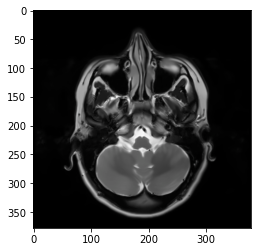

In [145]:
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.imshow(dst)

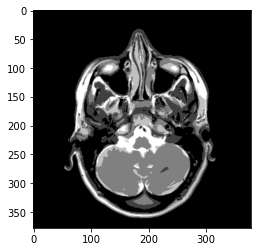

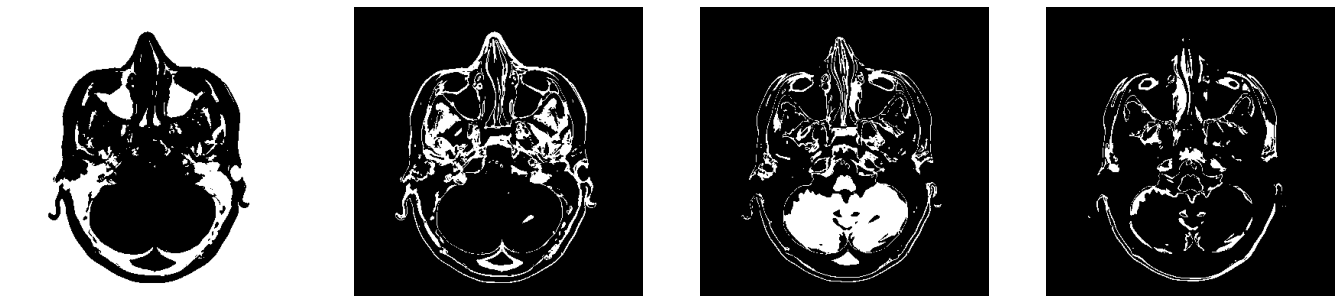

In [146]:
numClases = 5
dstGray = cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)
#Los umbrales son siempre 1 menos que las categorías
umbrales = threshold_multiotsu(dstGray,numClases)
regions = np.digitize(dstGray,bins=umbrales)

plt.imshow(regions,cmap="gray")

figura=plt.figure(figsize = (30,30))
for i in range(len(umbrales)):
    imgBinaria = dstGray.copy()

    imgBinaria[regions==i]=1
    imgBinaria[regions!=i]=0

    figura.add_subplot(1, numClases, i+1)
    plt.imshow(imgBinaria,cmap="gray")
    plt.axis("off")

(-0.5, 377.5, 377.5, -0.5)

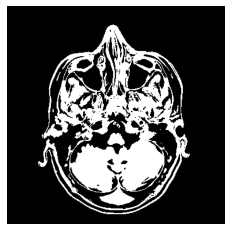

In [151]:
regionsOfInterest = [1,2]   #TODO modificar dinámicamente???
mask = img.copy()
mask[True]=0        #Limpiar la máscara a ceros

for i in range(len(regionsOfInterest)):
    mask[regions==regionsOfInterest[i]]=255

plt.imshow(mask)
plt.axis("off")

**Separar componente de mayor tamaño**

24844905.0


(-0.5, 377.5, 377.5, -0.5)

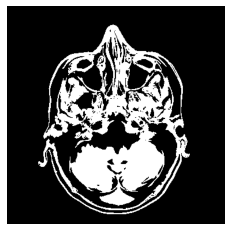

In [152]:
from scipy import ndimage
label_im, nb_labels = ndimage.label(mask)
nb_labels # how many regions?

plt.imshow(label_im)  

sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))

print(max(sizes))

mask_size = sizes < max(sizes)

remove_pixel = mask_size[label_im]
remove_pixel.shape

label_im[remove_pixel] = 0
label_im[label_im>=1]=255

plt.imshow(label_im,cmap="gray")
plt.axis("off")



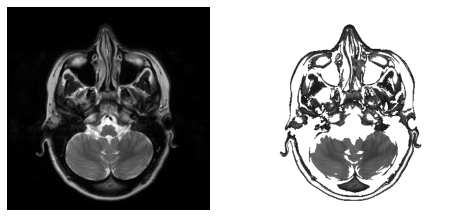

In [153]:
from skimage import color
imgGray = color.rgb2gray(img)
out = img.copy()
for i in range(label_im.shape[0]):
    for j in range(label_im.shape[1]):
        if(label_im[i][j].any()):
            out[i][j]=img[i][j]
        else:
            out[i][j]=255

fig6=plt.figure(figsize = (8,8))
a = fig6.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

b = fig6.add_subplot(1, 2, 2)
plt.imshow(out, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');